In [2]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import glob, os

### Load image

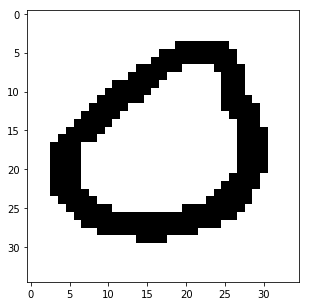

In [2]:
plt.figure(figsize=(10,5))
pic = Image.open(f'data/0/number-0000000.png').convert('L')
plt.imshow(pic)

### Resize image

In [3]:
img = pic.resize((28,28), Image.ANTIALIAS)
# plt.imshow(img)

### Create array from image

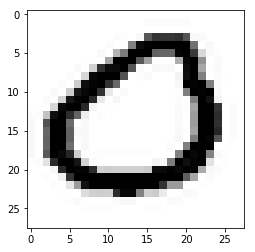

In [4]:
pix = np.array(img)
# print(pix)
plt.imshow(pix, cmap='gray')

# shape = pix.shape
# flat_arr = pix.ravel()
# arr2 = flat_arr.reshape(shape)
# img2 = Image.fromarray(arr2, 'L')
# img2.show()

### Load images in a loop

In [5]:
# get working directory
os.getcwd()

'C:\\Users\\Asus\\GIT\\machineLearningDS\\digits'

In [6]:
image_list = []
for file in glob.glob("data/0/*.PNG"):
    pic = Image.open(file).convert('L')
    img = pic.resize((28,28), Image.ANTIALIAS)
    pix = np.array(img)
    flat_arr = pix.ravel()
    image_list.append(flat_arr)

In [7]:
len(image_list)

1000

In [8]:
# adding label to matrix row
image_list_y = [np.insert(item,0,0,axis=0) for item in image_list]

### Reshaping and plotting

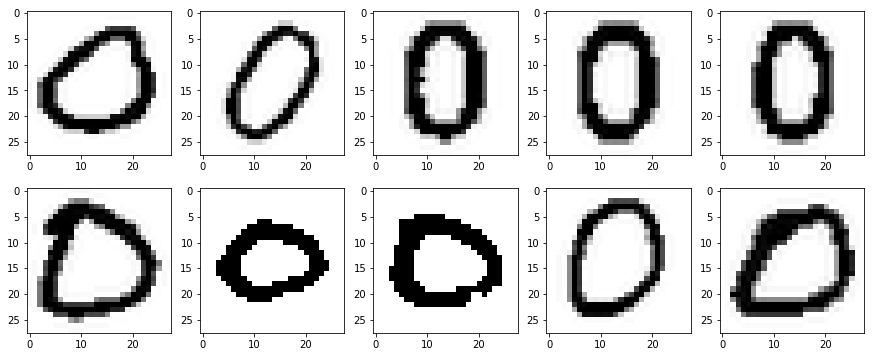

In [9]:
fig, ax = plt.subplots(2,5, figsize=(15, 6))
ax = ax.ravel()

shape = (28,28)

for i in range(10):
    arr2 = image_list_y[i][1:].reshape(shape)
    img2 = Image.fromarray(arr2, 'L')
    ax[i].imshow(img2)

## Create matrix

In [10]:
images_matrix = np.array(image_list_y)
images_matrix.shape

(1000, 785)

In [50]:
# df_array = pd.DataFrame({'images':image_list})
# df_array

# Data prepare function

In [3]:
def data_prepare(digit = 0):
    image_list = []
    for file in glob.glob(f"data/{digit}/*.PNG"):
        pic = Image.open(file).convert('L')
        img = pic.resize((28,28), Image.ANTIALIAS)
        pix = np.array(img)
        flat_arr = pix.ravel()
        image_list.append(flat_arr)
    if len(image_list) < 1000:
        print("achtung cos nie pyklo z lista")
    # adding label to matrix row
    image_list_y = [np.insert(item,0,digit,axis=0) for item in image_list]
    images_matrix = np.array(image_list_y)
    if images_matrix.shape != (1000, 785):
        print("achtung 2 cos nie pyklo z shapem")
    else:
        print(digit, images_matrix.shape)
    
    return images_matrix

In [4]:
# using data_prepare function for all digits (subfolders)
for digit in range(0,10):
    if digit == 0:
        im = data_prepare(digit)
    else:
        im_temp = data_prepare(digit)
        im = np.concatenate((im, im_temp), axis=0)

0 (1000, 785)
1 (1000, 785)
2 (1000, 785)
3 (1000, 785)
4 (1000, 785)
5 (1000, 785)
6 (1000, 785)
7 (1000, 785)
8 (1000, 785)
9 (1000, 785)


In [5]:
im.shape

(10000, 785)

In [8]:
df_array = pd.DataFrame(im)
df_array.to_csv("df.csv")

In [37]:
np.savetxt("data.csv", im, delimiter=",")